<a href="https://colab.research.google.com/github/smilyamit/Deep_Learning/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🐩 End to end dog multiclass breed classification

using tensorflow 2.0
#1 problem
Identifying the breed of a doggiven an image

#2 Data
from kaggle dog breed identification classification

https://www.kaggle.com/c/dog-breed-identification/data

#3 Evaluation
Submissions are evaluated on Multi Class Log Loss between the predicted probability and the observed target.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

#4 features
 some information about the data
 *we are dealing with images (unstructured data)
  so we will use deep learning method
  * there is 10k images in both test and train folder
  * these images are unlabed, because we want to predict them

In [0]:
#unzip the uploaded data into google drive
#!unzip "drive/My Drive/Colab Notebooks/dog vision/dog-breed-identification.zip" -d "drive/My Drive/Colab Notebooks/dog vision/"

## Get our workspace ready
tensorflow 2 is used ✅
tensorflow_hub is imported  ✅
gpu is loaded ✅

In [0]:
import tensorflow as tf
import tensorflow_hub as hub    
print('tensorflow', tf. __version__)
print('tensorflow_hub', hub. __version__)

#check for gpu avaliability
print('gpu', 'is available' if tf.config.list_physical_devices('GPU') else 'not available')

tensorflow 2.2.0-rc3
tensorflow_hub 0.8.0
gpu is available


In [0]:
import pandas as pd
df = pd.read_csv('drive/My Drive/Colab Notebooks/dog vision/labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
df.shape

(10222, 2)

In [0]:
df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

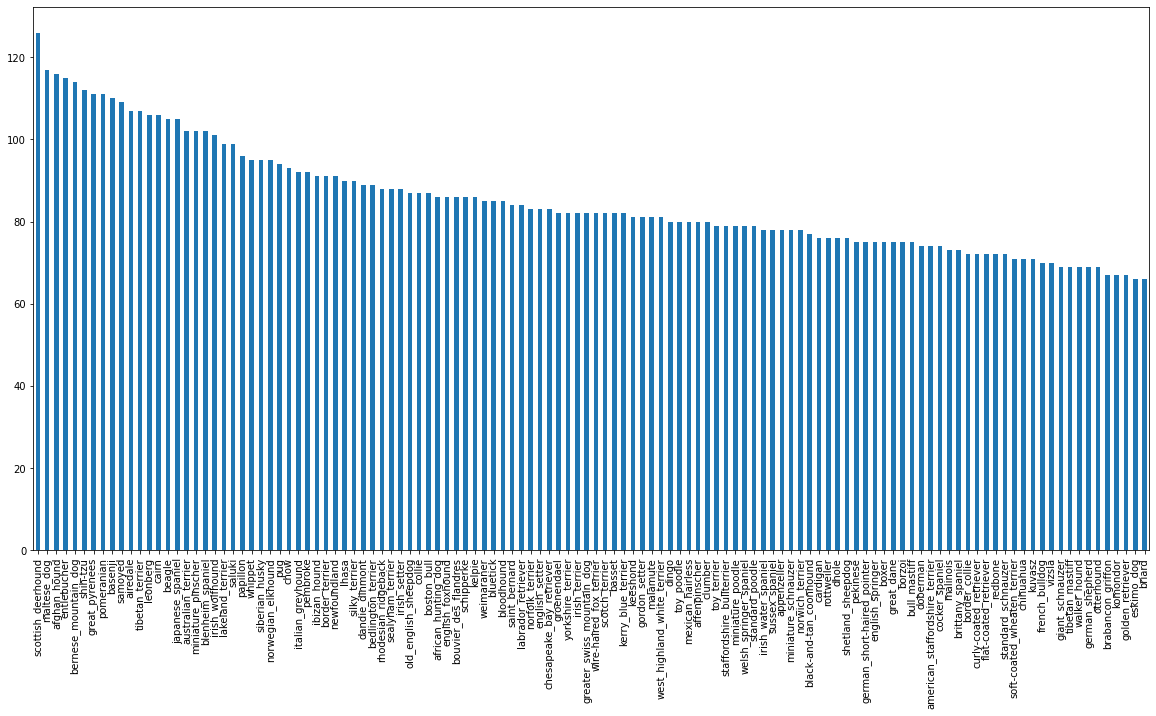

In [0]:
df['breed'].value_counts().plot.bar(figsize=(20,10))

In [0]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
from IPython.display import Image
Image("drive/My Drive/Colab Notebooks/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg ")

In [0]:
filename = [fname for fname in df['id']]
filename[:10]


['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [0]:
s1 = pd.Series(['cat','dog','pandas','bear'], index=[9,3,4,5])
s1

9       cat
3       dog
4    pandas
5      bear
dtype: object

In [0]:
s1.loc[4]

'pandas'

In [0]:
s1.iloc[3]

'bear'